In [ ]:
# importing libraries
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [26]:
df=pd.read_csv("titanic.csv")

In [27]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age   Desc  \
0                            Braund, Mr. Owen Harris    male  22.0  Adult   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0  Adult   
2                             Heikkinen, Miss. Laina  female  26.0  Adult   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0  Adult   
4                           Allen, Mr. William Henry    male  35.0  Adult   

   SibSp  Parch            Ticket     Fare Cabin Embarked  
0      1      0         A/5 21171   7.2500   NaN        S  
1      1      0          PC 17599  71.2833   C85        C  
2      0      0  STON/O2. 3101282   7.9250   NaN        S  
3      1      0            113803  53.1000  C123        S  
4      0      0     

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   Desc         891 non-null    object 
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [29]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Desc             0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


C:\Users\harsh\AppData\Local\Temp\ipykernel_22996\3823115358.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_22996\3823115358.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [31]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Desc           0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [32]:
df.duplicated().sum()

np.int64(0)

In [33]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


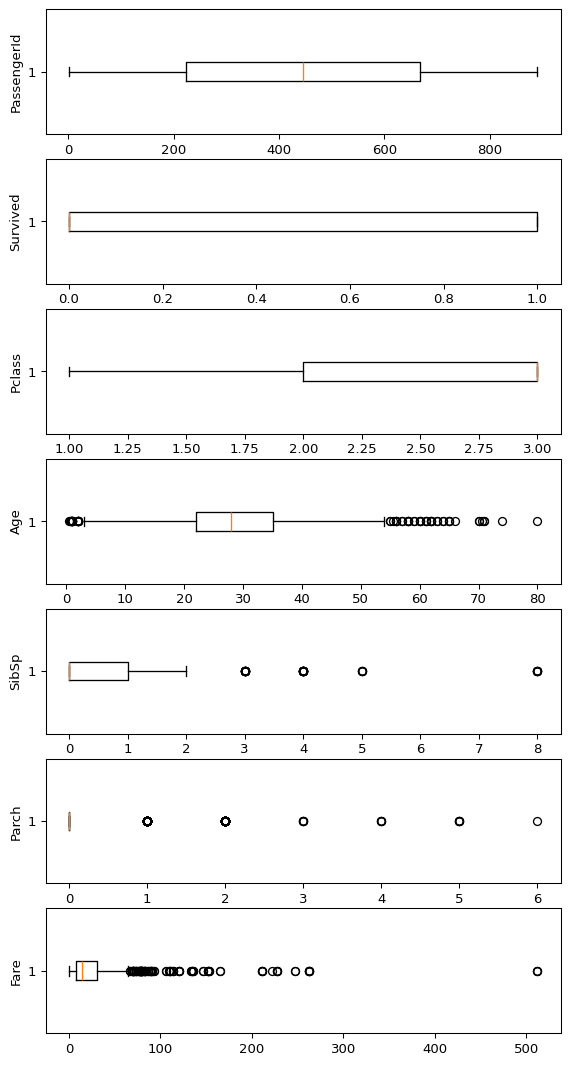

In [34]:
import matplotlib.pyplot as plt

numeric_cols= df.select_dtypes(include=['number']).columns

fig, axs= plt.subplots(len(numeric_cols),1, dpi=95, figsize=(7,len(numeric_cols)*2))
i=0
for col in numeric_cols:
    axs[i].boxplot(df[col].dropna(), vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

In [35]:
#drop the outliers

q1,q3=np.percentile(df['PassengerId'],[25,75])
iqr=q3-q1
lower_bound=q1-(1.5* iqr)
upper_bound=q3+(1.5* iqr)
clean_data=df[(df['PassengerId'] >= lower_bound)&(df['PassengerId']<=upper_bound)]

q1,q3=np.percentile(df['Survived'],[25,75])
iqr=q3-q1
lower_bound=q1-(1.5* iqr)
upper_bound=q3+(1.5* iqr)
clean_data=df[(df['Survived'] >= lower_bound)&(df['Survived']<=upper_bound)]

q1,q3=np.percentile(df['Pclass'],[25,75])
iqr=q3-q1
lower_bound=q1-(1.5* iqr)
upper_bound=q3+(1.5* iqr)
clean_data=df[(df['Pclass'] >= lower_bound)&(df['Pclass']<=upper_bound)]

q1,q3=np.percentile(df['Age'],[25,75])
iqr=q3-q1
lower_bound=q1-(1.5* iqr)
upper_bound=q3+(1.5* iqr)
clean_data=df[(df['Age'] >= lower_bound)&(df['Age']<=upper_bound)]

q1,q3=np.percentile(df['SibSp'],[25,75])
iqr=q3-q1
lower_bound=q1-(1.5* iqr)
upper_bound=q3+(1.5* iqr)
clean_data=df[(df['SibSp'] >= lower_bound)&(df['SibSp']<=upper_bound)]

q1,q3=np.percentile(df['Parch'],[25,75])
iqr=q3-q1
lower_bound=q1-(1.5* iqr)
upper_bound=q3+(1.5* iqr)
clean_data=df[(df['Parch'] >= lower_bound)&(df['Parch']<=upper_bound)]

q1,q3=np.percentile(df['Fare'],[25,75])
iqr=q3-q1
lower_bound=q1-(1.5* iqr)
upper_bound=q3+(1.5* iqr)
clean_data=df[(df['Fare'] >= lower_bound)&(df['Fare']<=upper_bound)]


Non-numeric columns: Index(['Name', 'Sex', 'Desc', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


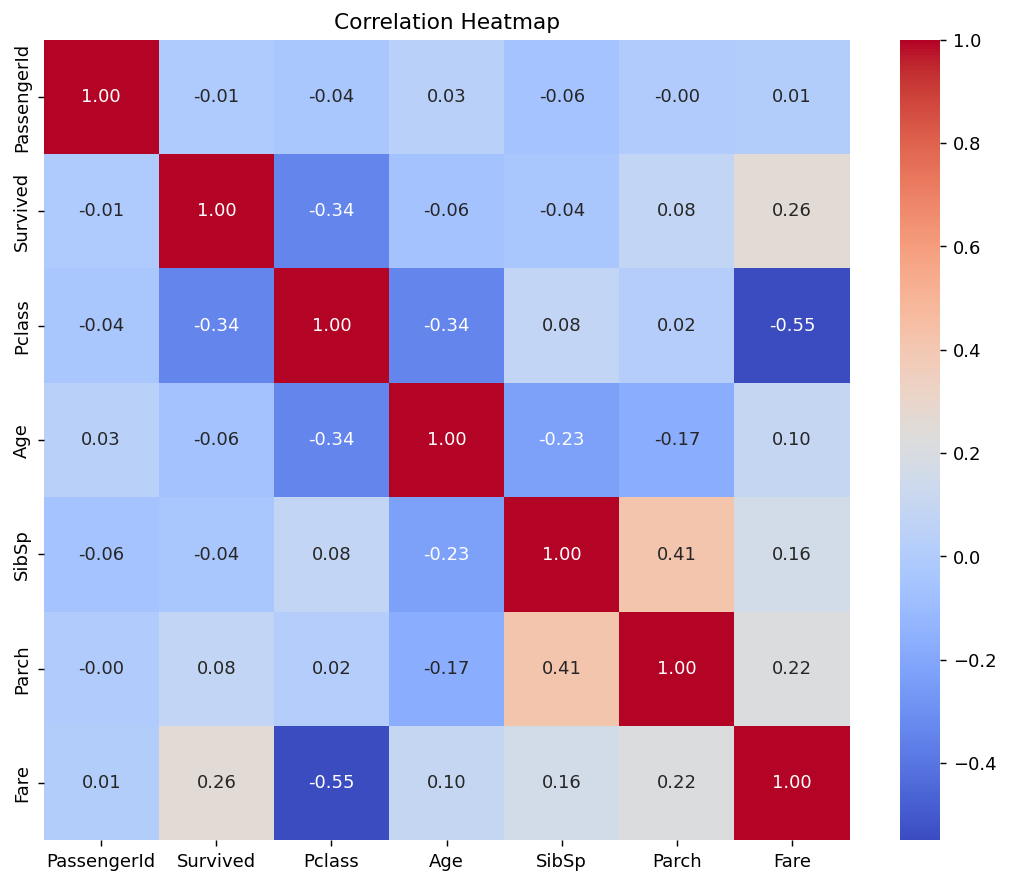

In [37]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)

numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()

plt.figure(dpi=130, figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap")
plt.show()


In [38]:
def hist_plot(variable):
  plt.figure(figsize=(9,3))
  plt.hist(df[variable],bins=50)
  plt.xlabel(variable)
  plt.ylabel("Frequency")
  plt.title("{} distribution with hist".format(variable))
  plt.show()

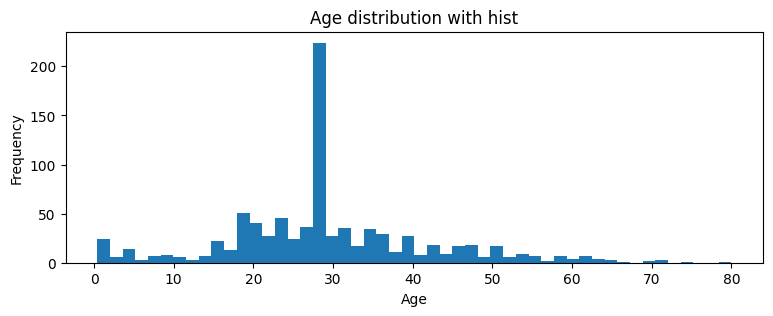

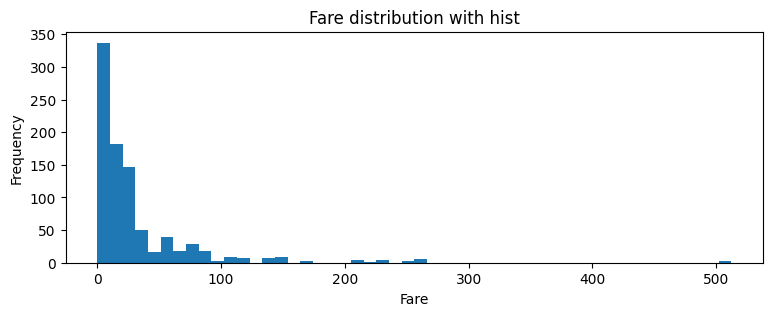

In [39]:
numericVar=['Age','Fare']
for n in numericVar:
  hist_plot(n)

In [40]:
def bar_plot(variable):

  var_val=df[variable].value_counts()

  plt.figure(figsize=(9,3))
  plt.bar(var_val.index,var_val)
  plt.xticks(var_val.index,var_val.index.values)
  plt.ylabel("Frequency")
  plt.title(variable)
  plt.show
  print("{} \n {}".format(variable,var_val))

Survived 
 Survived
0    549
1    342
Name: count, dtype: int64
Sex 
 Sex
male      577
female    314
Name: count, dtype: int64
Pclass 
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Embarked 
 Embarked
S    646
C    168
Q     77
Name: count, dtype: int64
SibSp 
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parch 
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


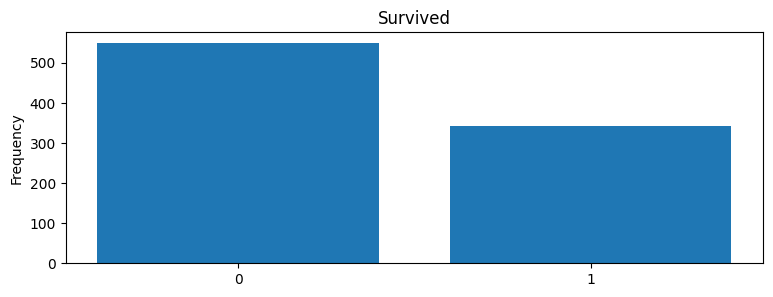

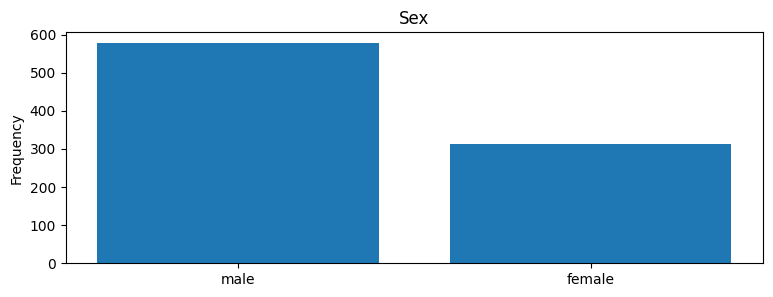

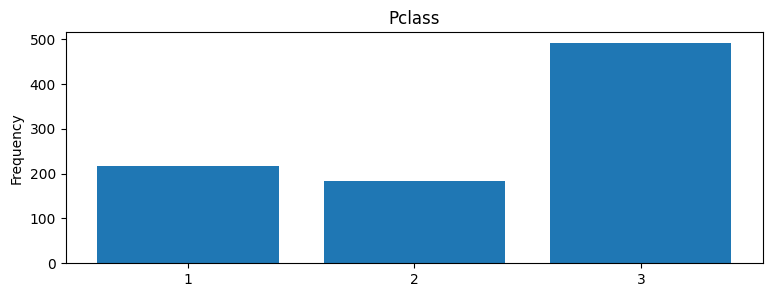

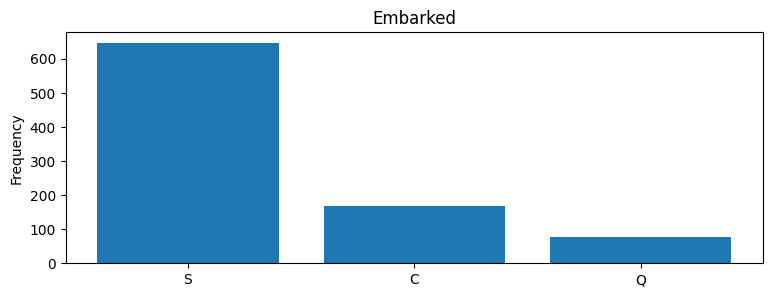

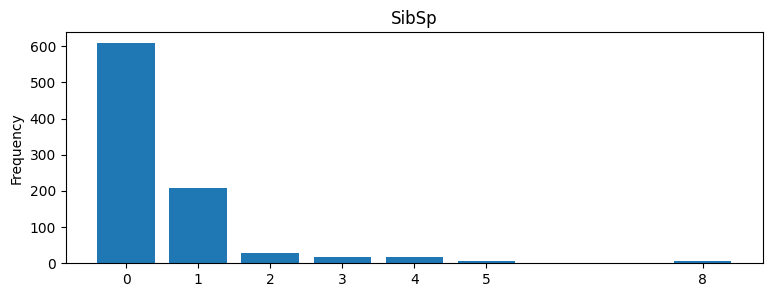

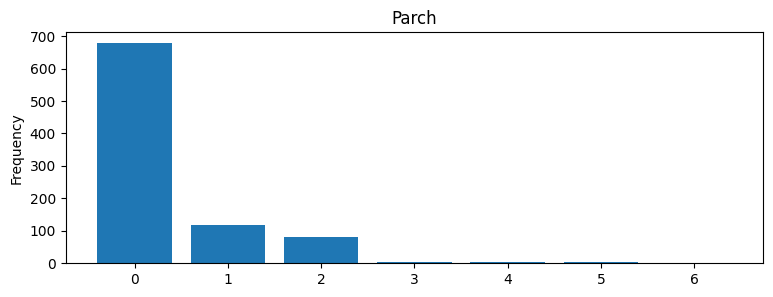

In [41]:
category1=['Survived','Sex','Pclass','Embarked','SibSp','Parch']

for c in category1:
  bar_plot(c)

In [42]:
category2=['Name','Ticket']
for c in category2:
  print("{} \n".format(df[c].value_counts()))

Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64 

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64 

